In [31]:
import os
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [35]:
BROADWAY_DATA_URL = "https://data.seattle.gov/api/views/j4vh-b42a/rows.csv?accessType=DOWNLOAD"

def get_broadway_data(url=BROADWAY_DATA_URL, filename="broadway_bike_data.csv"):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data = (pd.read_csv(filename, index_col='Date', parse_dates=True)
            .loc[:, ['NB', 'SB', 'Broadway Cycle Track North Of E Union St Total']])
    data.columns = ['North-bound', 'South-bound', 'Total']
    return data

In [36]:
data = get_broadway_data()
data.head()

,North-bound,South-bound,Total
Date,,,
2014-01-01 00:00:00,0.0,2.0,2.0
2014-01-01 01:00:00,3.0,10.0,13.0
2014-01-01 02:00:00,0.0,2.0,2.0
2014-01-01 03:00:00,0.0,0.0,0.0
2014-01-01 04:00:00,0.0,0.0,0.0


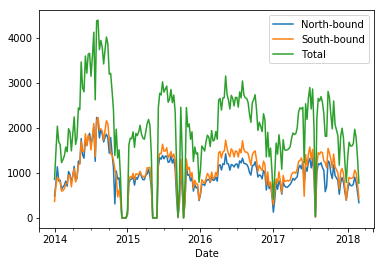

In [37]:
data.resample('W').sum().plot()